# 语音业务

In [1]:
import numpy as np
import pandas as pd

### Clean Up

In [2]:
data_raw = pd.read_excel("附件1语音业务用户满意度数据.xlsx").set_index("用户id")

In [3]:
data = data_raw.copy()
data

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,-1,2,-1,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
2,2,1,1,1,1,1,2,-1,4,-1,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
3,10,7,7,7,1,-1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
4,6,7,7,6,1,1,2,-1,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
5,5,5,4,3,1,-1,2,-1,-1,5,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,10,10,10,8,1,-1,2,-1,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5430,10,10,10,10,1,1,2,-1,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5431,6,5,7,4,1,-1,-1,-1,4,-1,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00


In [4]:
# Binary Conversion

bool_1 = ["居民小区","办公室","高校","商业街","地铁"]
bool_2 = ["手机没有信号","有信号无法拨通","通话过程中突然中断","通话中有杂音、听不清、断断续续","串线","通话过程中一方听不见"]
bool_3 = ["脱网次数","mos质差次数","未接通掉话次数"]

def binary(df, tar):
    df[tar] = df[tar].apply(pd.to_numeric, errors='coerce')<=0
    return df

data = binary(data, bool_1)
data = binary(data, bool_2)
data = binary(data, bool_3)

In [5]:
# Class Conversion

class_1 = [r"4\5G用户", "是否5G网络客户", "语音方式", "终端品牌"]
class_2 = ["是否实名登记用户","客户星级标识"]

def classif(df, tar):
    for cls in tar:
        df[cls],_ = pd.factorize(df[cls])
        
    return df

data = classif(data, class_1)
data = classif(data, class_2)

In [6]:
data.head()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,True,False,True,True,True,...,0.0,480,1.0,8450801,8450801,0,0,0,0.0,0.00
2,2,1,1,1,1,False,False,True,False,True,...,0.0,480,1.0,17425910,17425910,0,1,0,0.0,0.00
3,10,7,7,7,1,True,True,True,True,True,...,0.0,413,1.0,6215849,6215849,1,0,1,0.0,3.76
4,6,7,7,6,1,False,False,True,True,True,...,0.0,301,1.0,5370710,5370710,0,0,1,0.0,0.00
5,5,5,4,3,1,True,False,True,True,False,...,0.0,1193,1.0,3857521,3857521,1,0,0,0.0,0.00


In [7]:
int_score = ["语音通话整体满意度","网络覆盖与信号强度","语音通话清晰度","语音通话稳定性"]

data[int_score] = data[int_score].apply(pd.to_numeric, errors='coerce')

In [8]:
score = data[int_score]
score = score.values.T
score

array([[10,  2, 10, ...,  6,  9, 10],
       [ 6,  1,  7, ...,  5,  9, 10],
       [ 6,  1,  7, ...,  7, 10, 10],
       [ 6,  1,  7, ...,  4,  9, 10]], dtype=int64)

## 打分线性回归

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(score[1:].T, score[0])

LinearRegression()

### 拟合结果

In [11]:
import matplotlib.pyplot as plt

[0.29897125 0.44369613 0.19968409]
0.6732004276680339


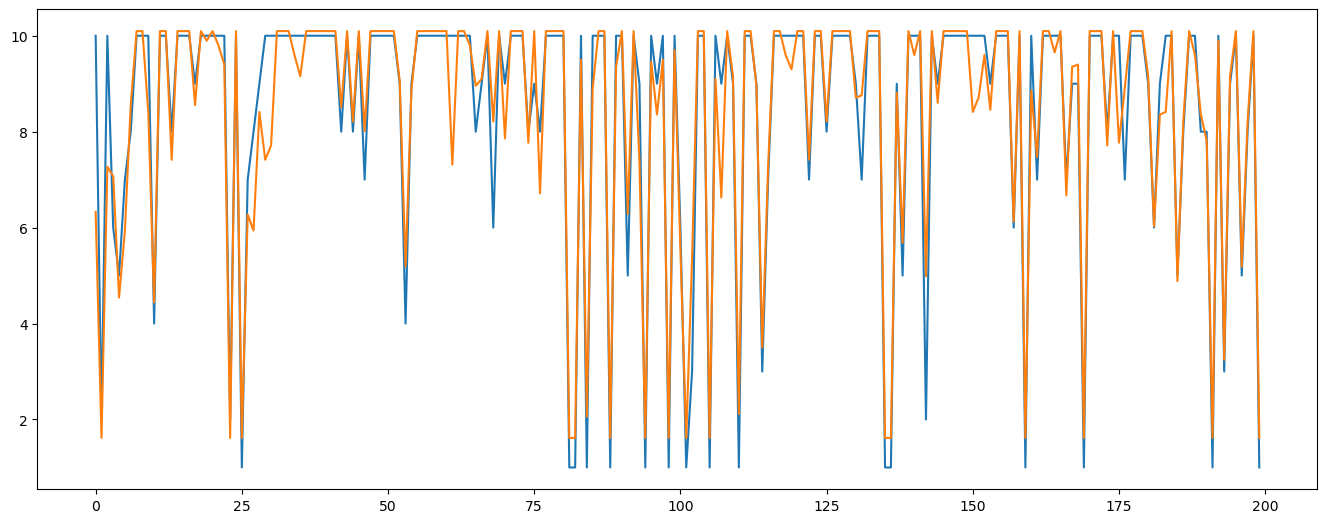

In [12]:
plt.plot(score[0, :200])

score_pred = model.predict(score[1:].T)
plt.plot(score_pred[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print(model.coef_)
print(model.intercept_)

## 决策树打分逐项分析

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
sig_regr = DecisionTreeRegressor(max_depth=20)

### 信号强度分析 

In [34]:
signal = data[bool_1+bool_2+class_1].values
signal

array([[True, False, True, ..., 0, 0, 0],
       [False, False, True, ..., 0, 0, 1],
       [True, True, True, ..., 1, 1, 1],
       ...,
       [True, True, True, ..., 1, 1, 1],
       [True, True, True, ..., 1, 2, 4],
       [False, False, True, ..., 1, 1, 0]], dtype=object)

In [35]:
sig_regr.fit(signal, score[1])

DecisionTreeRegressor(max_depth=20)

accr: 0.5466593042517945


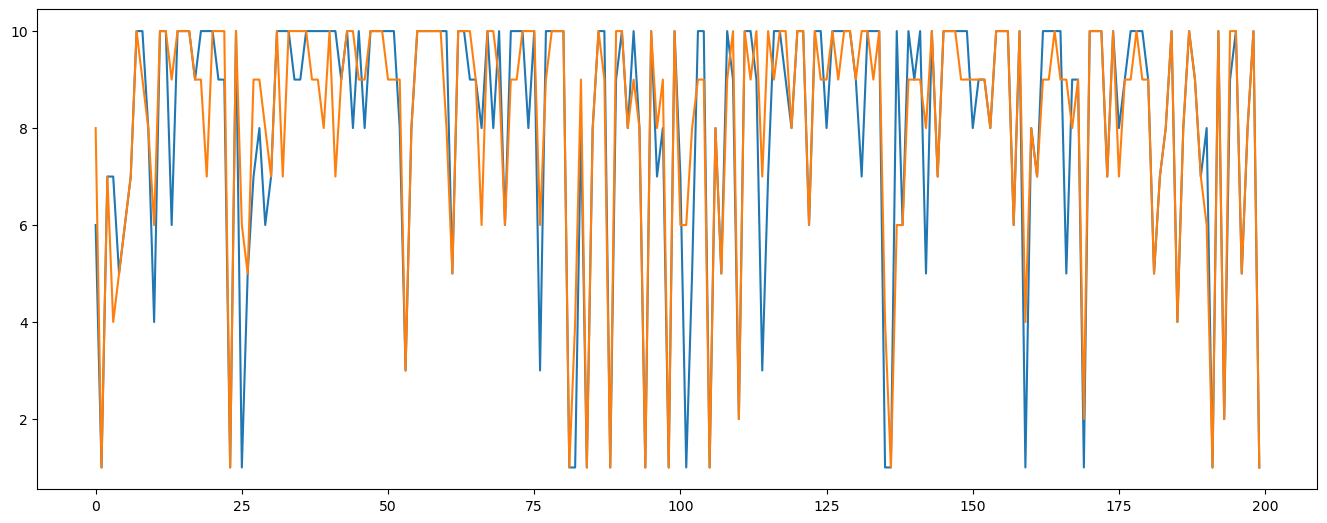

In [36]:
signal_scr_pred = sig_regr.predict(signal)
signal_scr_pred_r = np.round(signal_scr_pred)

plt.plot(score[1, :200])
plt.plot(signal_scr_pred_r[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print("accr:",accuracy_score(score[1], signal_scr_pred_r))

### 清晰度分析

In [37]:
clar_regr = DecisionTreeRegressor(max_depth=20)

clarity = data[bool_1+bool_2+bool_3+class_1].values
clarity

array([[True, False, True, ..., 0, 0, 0],
       [False, False, True, ..., 0, 0, 1],
       [True, True, True, ..., 1, 1, 1],
       ...,
       [True, True, True, ..., 1, 1, 1],
       [True, True, True, ..., 1, 2, 4],
       [False, False, True, ..., 1, 1, 0]], dtype=object)

In [38]:
clar_regr.fit(clarity, score[2])

DecisionTreeRegressor(max_depth=20)

accr: 0.7710288974783729


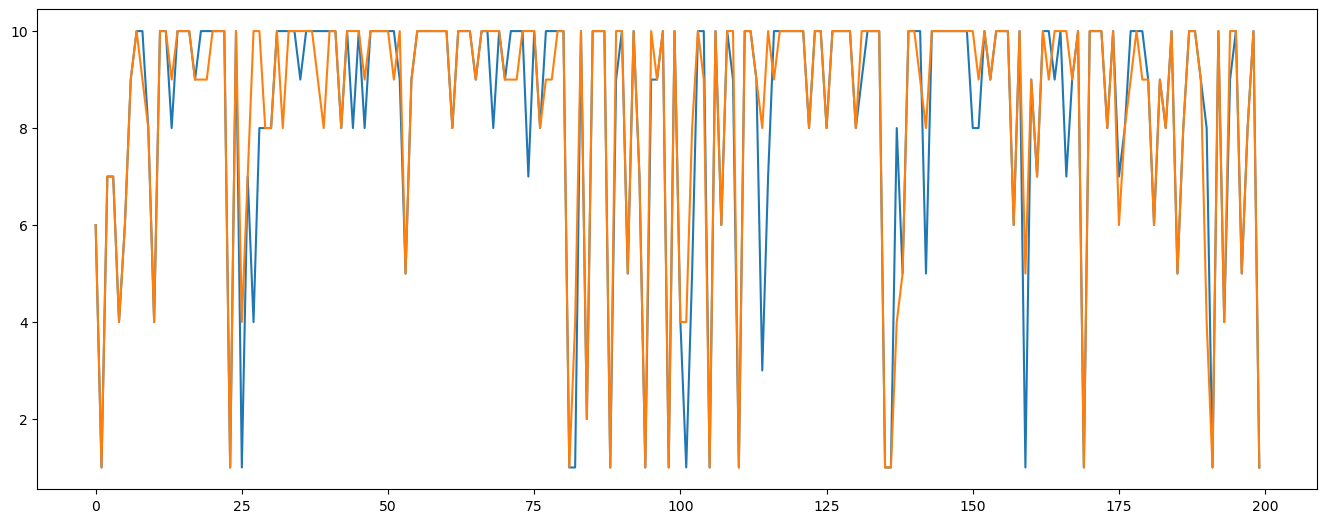

In [39]:
clar_scr_pred = clar_regr.predict(clarity)
clar_scr_pred_r = np.round(clar_scr_pred)

plt.plot(score[2, :200])
plt.plot(clar_scr_pred_r[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print("accr:",accuracy_score(score[2], clar_scr_pred_r))

### 稳定性分析

In [40]:
stab_regr = DecisionTreeRegressor(max_depth=20)

stability = data[bool_1+bool_2+bool_3+class_1].values
stability

array([[True, False, True, ..., 0, 0, 0],
       [False, False, True, ..., 0, 0, 1],
       [True, True, True, ..., 1, 1, 1],
       ...,
       [True, True, True, ..., 1, 1, 1],
       [True, True, True, ..., 1, 2, 4],
       [False, False, True, ..., 1, 1, 0]], dtype=object)

In [41]:
stab_regr.fit(stability, score[3])

DecisionTreeRegressor(max_depth=20)

accr: 0.5998527517025585


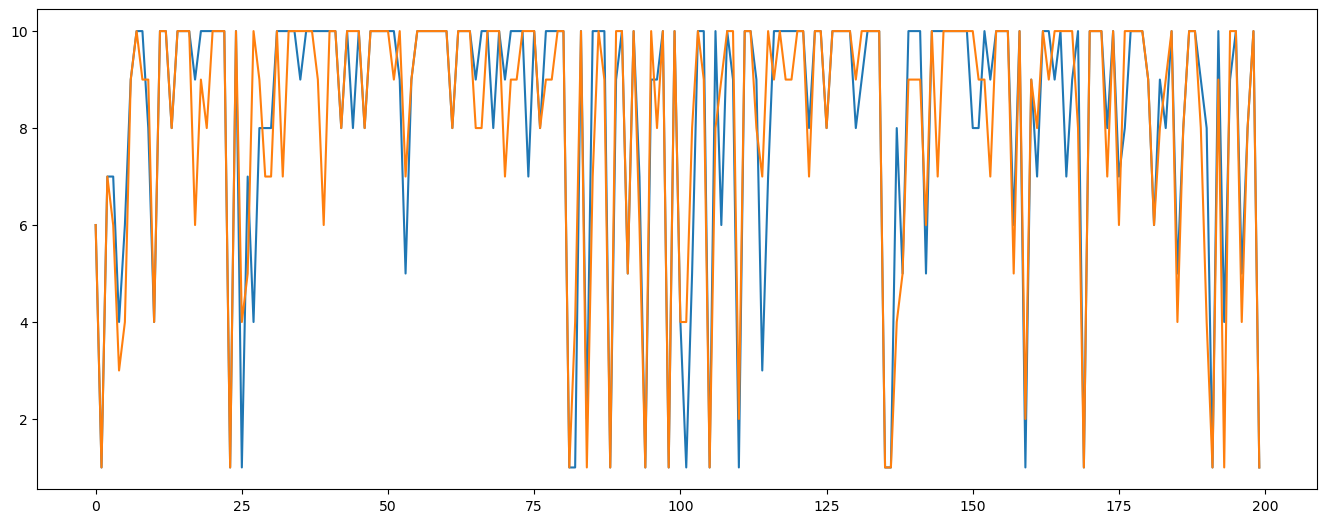

In [42]:
stab_scr_pred = stab_regr.predict(stability)
stab_scr_pred_r = np.round(stab_scr_pred)

plt.plot(score[2, :200])
plt.plot(stab_scr_pred_r[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print("accr:",accuracy_score(score[2], stab_scr_pred_r))

## 整体估计

accr: 0.597644027240935


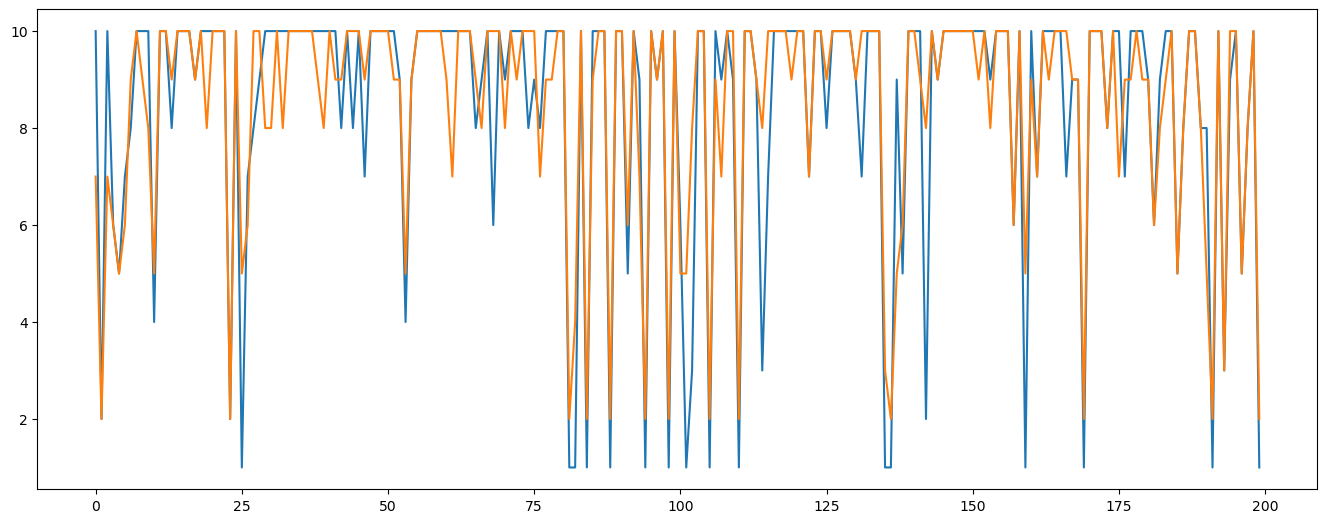

In [44]:
pred_sub = np.array([signal_scr_pred, clar_scr_pred, stab_scr_pred]).T
pred = model.predict(pred_sub)

plt.plot(score[0, :200])
plt.plot(np.round(pred[:200]))

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print("accr:",accuracy_score(score[0], np.round(pred)))